# Einleitung
<p style="text-align: justify">Dieses Jupyter-Notebook dient dem Analysieren und Visualisieren der Kommentare in den Bundestagsreden im Plenarsaal.</p>

<p style="text-align: justify">Kommentare sind dabei Anmerkungen, die durch die Protokollanten beschrieben werden. Diese Anmerkungen können verschiedene Reaktionen im Plenarsaal sein oder Wortmeldungen von Bundestagsabgeordneten. Dadurch können Meinungsbilder im Zusammenhang von Reden tiefergehend abgebildet werden.</p> 

<p style="text-align: justify">Im ersten Schritt wurden dahingehend die häufigsten wiederkehrenden Begriffe durch manuelle Suche herausgefiltert und im Gruppenplenum zur weiteren Verwertung für die angestrebte Webseite mittels verschiedener Funktionen in diesem Jupyter-Notebook aufbereitet.
Die Funktionen sind zum einem die Tagesordnungspunkte anhand der Redner je Fraktion durch Parteinennungen zu überführen und anschließend je Partei eine statistische Auswertung von definierten Schlagworten zu untersuchen und nach quantitativen Merkmalen aufzuzeigen.</p>

Ziel ist eine erweiterte Klassifizierung von Zuspruch oder Ablehnung auf Fraktionsebene und somit je Themenbereich ein Meinungsbild für die Fraktionen abzubilden. Dadurch ist die erweiterte Informationsdarstellung je Thema hinsichtlich einer möglichen Themen-Koalition aufzeigbar.</p>

<p style="text-align: justify">
    Als <b>Datensatz</b> werden die Plenarprotokolle des deutschen Bundestages für die <b>20. Wahlperiode</b> <a href="https://bundestag.de/services/opendata">https://bundestag.de/services/opendata</a> zugrundegelegt. Der Datensatz enthält derzeit folgende XML-Dateien vom Bundestagsserver:

In [1]:
import os
print(os.listdir('../../parser/data_20'))

['20030-data.xml', '20031-data.xml', '20079-data.xml', '20078-data.xml', '20047-data.xml', '20046-data.xml', '20073-data.xml', '20072-data.xml', '20096-data.xml', '20097-data.xml', '20004-data.xml', '20005-data.xml', '20027-data.xml', '20026-data.xml', '20050-data.xml', '20051-data.xml', '20019-data.xml', '20018-data.xml', '20064-data.xml', '20065-data.xml', '20013-data.xml', '20012-data.xml', '20081-data.xml', '20080-data.xml', '20069-data.xml', '20068-data.xml', '20020-data.xml', '20021-data.xml', '20057-data.xml', '20056-data.xml', '20063-data.xml', '20062-data.xml', '20086-data.xml', '20087-data.xml', '20014-data.xml', '20015-data.xml', '20037-data.xml', '20036-data.xml', '20009-data.xml', '20008-data.xml', '20040-data.xml', '20041-data.xml', '20074-data.xml', '20075-data.xml', '20003-data.xml', '20002-data.xml', '20091-data.xml', '20090-data.xml', '20067-data.xml', '20066-data.xml', '20010-data.xml', '20011-data.xml', '20082-data.xml', '20083-data.xml', '20059-data.xml', '20058-da

<p style="text-align: justify">
Dabei werden Listen für folgende Schlagworte erstellt:
    <li>Beifall = positiver Zuspruch und Zustimmung von Fraktionen und/oder einzelnen Personen einer Fraktion</li>
    <li>Zuruf = kontextabhängige positive oder negative Wortmeldung einer Fraktionsperson zur Redner-Partei</li>
    <li>Gegenruf = kritische Wortmeldung einer Fraktionspartei zur Redner-Partei</li>
    <li>Lachen = situativ-abhängige positive oder negative Reaktion</li>
    <li>Widerspruch = gegenteilige Wortmeldung einer Fraktionsperson zur Redner-Partei</li>
    <li>Heiterkeit = kontextabhängiges positives oder negatives Stimmungsbild einer Fraktion oder einzelnen Personen einer Fraktion</li>
    <li>Unsinn = negative Wortmeldung einer Fraktionsperson zur Redner-Partei</li>
    Außerdem sind mögliche Themen-Bündnisse klassifizierbar und auch die fraktionslosen Kandidaten werden in der Untersuchung mit berücksichtigt.</p>

# Hypothese
<p style="text-align: justify">
    Zur Analyse der Daten wird folgende Hypothese angenommen:<br>
    <i>Die Regierungsparteien SPD, GRÜNE, FDP geben Rednern der Koaltionspartei mehr positive Reaktionen, als Rednern der
       Oppositionsfraktionen</i></p>

# Prozedur    
<p style="text-align: justify">
    Zur Durchführung der Analyse wird nach folgendem Ablauf verfahren (erstellt mit <a href="https://lucid.co">https://lucid.co):</a></p>

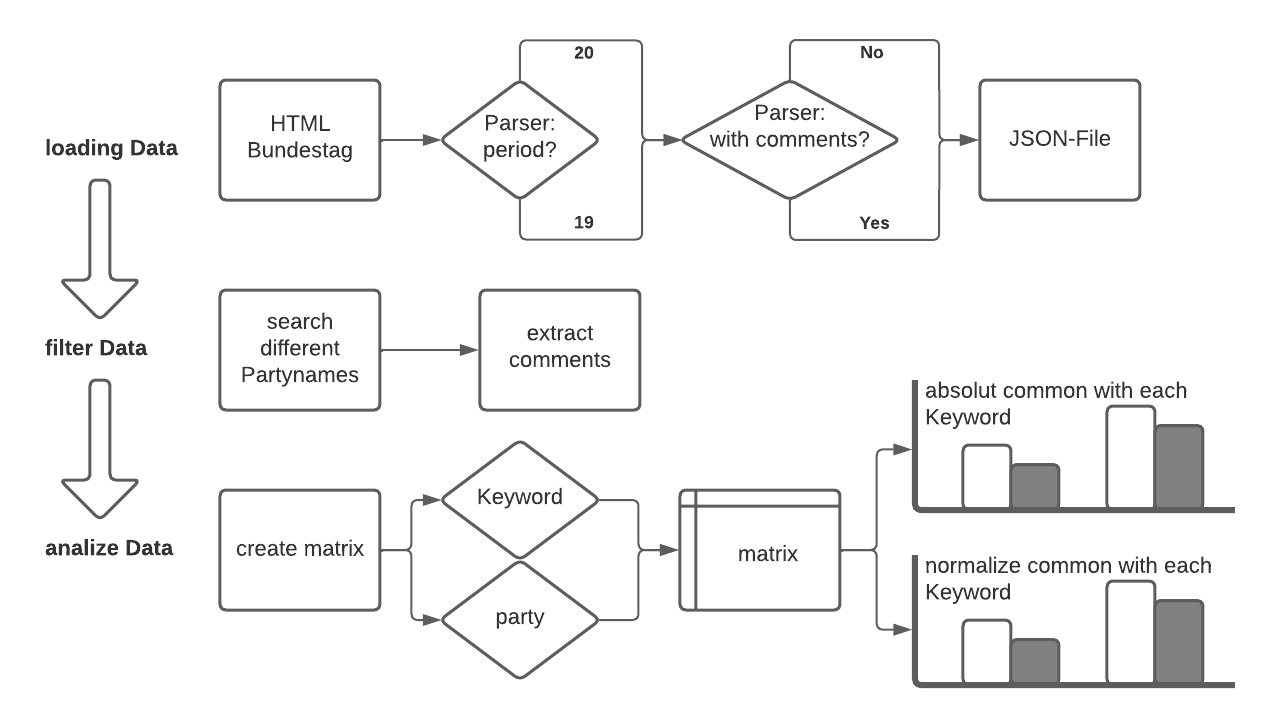

# Module und Bibliotheken einbinden
Es sind verschiedene Module und Bibliotheken zur Datenverarbeitung notwendig. Es sind bereits eine Vielzahl von Funktionen entwickelt und in Python abrufbar.
Diese Module können mit <b>import</b> geladen werden. Als Softwareverzeichnis mit der jeweiligen Beschreibung sind die jeweiligen Links angegeben:

<li><b>import collections</b> = dieses Modul importiert Standardbibliotheken von Python.
(<a href="https://pypi.org/project/collection">https://pypi.org/project/collection</a>)</li>

<li><b>import graphviz</b> = dieses Modul importiert Grafiken für Flussdiagramme
(<a href="https://graphviz.readthedocs.io/en/stable/index.html">https://graphviz.readthedocs.io/en/stable/index.html</a>)</li>
    
<li><b>import json</b> = dieses Modul importiert <b>J</b>ava<b>S</b>cript <b>O</b>bject <b>N</b>otation-Format ins Jupyter-Notebook.
(<a href="https://www.json.org/json-en.html">https://www.json.org/json-en.html</a>)</li>

<li><b>import matplotlib.pyplot</b> = dieses Modul dient der Visualisierung von mathematischen Zusammenhängen.
(<a href="https://matplotlib.org">https://matplotlib.org</a>)</li>

<li><b>import numpy</b> oder kurz <b>np</b> = dieses Modul ermöglicht Python Objektzähler, Counter und Zählen von Wörtern.
(<a href="https://numpy.org">https://numpy.org</a>)</li>

<li><b>import os</b> = dieses Modul ermöglicht Verzeichnisstrukturen verschiedener Betriebssystem zu nutzen.
(<a href="https://docs.python.org/3/library/os.html">https://docs.python.org/3/library/os.html</a>)</li>

<li><b>import re</b> = dieses Modul ermöglicht reguläre Ausdruckssyntax anzuwenden, z.B. Verkettungen.
(<a href="https://docs.python.org/3/library/re.html">https://docs.python.org/3/library/re.html</a>)</li>

<li><b>import request</b> = dieses Modul ermöglicht die vereinfachte HTML-Anfrage für Python-Bibliotheken.
(<a href="https://pypi.org/project/requests">https://pypi.org/project/requests</a>)</li>

<li><b>import sys</b> = dieses Modul stellt mittels Python-Interpret, z.B. Funktion und Methoden, zur Verfügung.  
(<a href="https://pypi.org/project/os-sys">https://pypi.org/project/os-sys</a>)</li>

In [2]:
import collections
import json
import matplotlib.pyplot as plt
from   matplotlib.pyplot import figure
import numpy as np
import os
import pandas as pd
import re
import requests
import sys

# Laden der Bundestagsreden
<p style="text-align: justify">Alle Reden des deutschen Bundetages für die 20. Wahlperiode sind in den Plenarprotokollen auf der Webseite des deutschen Bundestages in xml-Dateien abgespeichert. Für einen schnellen Zugriff und zur weiteren Verarbeitungen und einfachen Darstellung von Zwischenschritten und Teilausgaben wird dies mittels des Jupyter-Notebook in das JSON-Format überführt.</p>

<p style="text-align: justify">Die xml-Dateien der Plenarprotokolle sind in den Ordnern <b>bundestagsreden_parser\data_19</b> und <b>bundestagsreden_parser\data_20</b> abgelegt.
Dazu wird im ersten Schritt mittels des CMD im Ordner <b>bundestagsreden_parser</b> das Kommando <b>python run.py</b> ausgeführt. Beim Ausführen der Python-Datei können die Reden für die Legislaturperiode 19 oder 20, sowie mit und ohne Kommentarfelder erstellt werden.<br>
Wir laden mit dem nachfolgenden Code alle Reden der ausgewählten Legislaturperiode. Die vom Parser erstellten Dateien befinden sich nun unter dem Pfad <b>bundestagsreden\data</b>. Die vom Parser erstellte Datei heißt z.B. <b>speeches_20.jsonl</b> (ohne Kommentare) oder <b>speeches_20_with_comments.jsonl</b> (mit Kommentare).</p>

In [3]:
with open('../../data/speeches_20_with_comments.jsonl', 'r', encoding = 'utf8') as fp:
    data = list(fp)
speeches = []
for line in data:
    speeches.append(json.loads(line))
    

<p style="text-align: justify">Mit dem Befehl <b>"len"</b> können wir die Anzahl der Argumente, in unserem Fall: <b>speeches</b> (alle Reden), aus den geladenen Plenarprotokollen ausgeben lassen.<p>

In [4]:
len(speeches)

10791

<p style="text-align: justify">Die Attribute werden mittels des <b>bundestagsreden_parser</b> definiert und können aus der geladenen Datei <b>speeches_20_with_comments.jsonl</b> durch geeignete Suchfunktionen extrahiert werden.<br>
Wir können nun mit dem Befehl <b>print</b> und dem Index <b>[0]</b> die erste Rede ausgeben. Die folgenden Attribute jeder Rede werden dazu ausgeben:</p>
<table style="margin-left: 0; margin-right: 0;">
    <tr>
        <th style="text-align: left;">Attribut</th>
        <th style="text-align: left;">Beschreibung<th>
    </tr>
    <tr>
        <td style="text-align: left;">'text'</td>
        <td style="text-align: left;">Reden inklusive der Kommentare -> Kommentare werden mittels Parser in {(...)} dargestellt</td>
    </tr>
    <tr>
        <td style="text-align: left;">'id'</td>
        <td style="text-align: left;">zugewiesene ID der einzelnen Rede</td>
    </tr>
    <tr>
        <td style="text-align: left;">'period'</td>
        <td style="text-align: left;">Legislaturperiode in der die Rede gehalten wurde</td>
    </tr>
    <tr>
        <td style="text-align: left;">'date'</td>
        <td style="text-align: left;">Datum der Rede</td>
    </tr>
    <tr>
        <td style="text-align: left;">'name'</td>
        <td style="text-align: left;">Name des/r Redner/in</td>
    </tr>
    <tr>
        <td style="text-align: left;">'party'</td>
        <td style="text-align: left;">zugehörige Partei der/s Redner/in</td>
    </tr>
    <tr>
        <td style="text-align: left;">'redner_id'</td>
        <td style="text-align: left;">ID des/r Redner/in</td>
    </tr>
    <tr>
        <td style="text-align: left;">'discussion_title'</td>
        <td style="text-align: left;">Überschrift (mit Inhalt des Tagesordnungspunktes)</td>
    </tr>
</table>

In [5]:
print(speeches[1])


{'text': 'Frau Präsidentin! Sehr geehrte Kolleginnen und Kollegen! Eine Regierungsbefragung zu Zeiten des Krieges: Ich glaube, es ist nicht nur nicht einfach, sondern es ist eigentlich kaum möglich, in einer Minute Fragen dazu zu beantworten, was wir tun können, um diesen furchtbaren völkerrechtswidrigen Krieg zu stoppen. Denn die brutale Realität ist: Wir können diesen Krieg nicht mit einfachen Antworten stoppen. Das kann allein der russische Präsident. Daher ist es mir wichtig, hier heute im Namen der Bundesregierung eben nicht schnelle, einfache Antworten zu geben, sondern in dieser komplexen Lage, in der wir uns befinden, deutlich zu machen, was unsere Abwägungen sind, und vor allem ehrlich zu sein. Denn wir können in diesen Zeiten nur handeln, wenn wir gemeinsam mit unseren Bündnispartnern agieren, wenn wir entschlossen agieren und pragmatisch sind. So können wir dazu beitragen, Leid zu mindern, die Ukraine zu stützen, sie bei ihrem Recht auf Selbstverteidigung zu unterstützen und

# Reden mit Kommentaren je Partei filtern
<p style="text-align: justify",style='line-height: 0%'>
    Im ersten Schritt wollen wir alle Parteinamen des Attributs 'party' ausgeben lassen. Dazu erstellen wir die leere Liste <b>party_name</b>. Anschließend wird mittels einer for-Schleife jede Rede von allen Reden durchlaufen. Mittels der if-Bedingung wird verglichen, ob das gefundene Attribut bereits in der Liste <b>party_name</b> enthalten ist. Zwei Möglichkeiten sind hier definiert:</p>
<li>Nein -> gefundene Partei wird in der Liste hinzugefügt</li>
<li>Ja   -> "passen" und die for-Schleife erneut ausführen</li>
<p style="text-align: justify" margin="0">
Als Ausgabe erhalten wir die Liste <b>party_names</b> mit allen gefundenen Parteinamen im Attribut <b>party</b>.</p>

In [6]:
party_names = []
for speech in speeches:
    if speech['party'] in party_names:
        pass
    else:
        party_names.append(speech['party'])  
print(party_names)

['BÜNDNIS 90/DIE GRÜNEN', 'CDU/CSU', 'Fraktionslos', 'AfD', 'SPD', 'FDP', 'unknown', 'DIE LINKE']


<p style="text-align: justify">Zusätzlich zu den bekannten Parteinamen sehen wir die Bezeichnung <b>unknown</b>. Mittels des Parsers konnte jedoch die gefundene <b>redner_id</b> nicht einer Partei zugeordnet werden. D.h. in diesem Fall sprach der/die Redner/in nicht im Sinne der Fraktion, sondern im Sinne ihres Amtes (z.B. als Minister für Außenpolitik). In der xml-Dateien erhalten die Redner/in eine gesonderte <b>redner_id</b>, so dass die Fraktionszugehörig wegfällt und stattdessen eine Beschreibung der Minister-Position enthält.<br><br>    
    Als nächstes ermitteln wir, je gefundenen Parteinamen, die Summe aller gehaltenen Reden. Dazu erstellen wir mittels der Liste <b>party_names</b> ein <b>Dictionary</b> und definieren das Ausgabeformat mit "0".<br>
    Wir iterieren nun über alle Reden und zählen je Partei die Reden. Somit wird die Summe aller Reden je Partei berechnet. Die Anzahl der Reden zur jeweiligen Partei überführen wir in das erzeugte <b>dict_parties</b>.</p>

In [7]:
# Dictionary included 0
empty_list_per_party = []
for _ in range(len(party_names)):
    empty_list_per_party.append(0)
dict_parties = {k: v for k, v in zip(party_names, empty_list_per_party)}

# Dictionary fill quantity for each party
for speech in speeches:
    if speech['party'] in party_names:
        dict_parties[speech['party']] = dict_parties[speech['party']] + 1
    else:
        party_names.append(speech['party'])
        dict_parties[speech['party']] = 1
dict_parties

{'BÜNDNIS 90/DIE GRÜNEN': 1803,
 'CDU/CSU': 2345,
 'Fraktionslos': 45,
 'AfD': 1421,
 'SPD': 2424,
 'FDP': 1457,
 'unknown': 427,
 'DIE LINKE': 869}

<p style="text-align: justify">Im nächsten Schritt erstellen wir ein <b>Dictionary</b>, um die Kommentare je Parteiname zu filtern. Dazu wird zum KEY: 'party' ein leeres Array zugewiesen. In dem jeweiligen Array sind je Partei alle Kommentare von allen Reden einzufügen. Bereits im <b>bundestagsreden_parser</b> wurden mögliche verschiedene Schreibweisen von den Parteinamen bereinigt, sodass hier nur die folgenden Parteinamen auftauchen können. Die Schreibweisen im <b>Attribut 'party'</b> haben wir zudem im voran gegangenen Schritt herausgefunden.<br>
Wichtig ist dabei zu berücksichtigen, dass das Attribut bereits mittels des <b>bundestagsreden_parser</b> definiert wurde und die exakte Schreibweise übernommen werden muss.<p>

In [8]:
comments_per_party = []
for _ in range(len(party_names)):
    comments_per_party.append(['all comments per party'])
comments_to = {k: v for k, v in zip(party_names, comments_per_party)}

<p style="text-align: justify">Die Kommentare sind zudem in den JSON-Dateien im Attribut <b>'text'</b> enthalten. Durch den Parser wurde bereits um jeden Kommentar Klammern <b>{(...)}</b> ergänzt.
Die nachfolgende Funktion <b>extract_comments</b> extrahiert nun alle Textstellen im Attribut <b>'text'</b> mit den Klammern <b>{(...)}</b> und deren Inhalt. Alle gefundenen Zeichenfolgen <b>{(...)}</b>, werden mit der Python-Operation re.findall in die Liste <b>'comments'</b> eingefügt.<br>
Um das usprüngliche Attribut <b>'text'</b> nicht zu verändern, wird die Liste <b>'comments'</b> als neues Attribut 'comments' an die bestehende Rede angehängt.<p>

In [9]:
def extract_comments(speeches):
    regex = "{(.*?)}" # hier steht die genaue Definition der Kommentare vom Parser
    comments = []
    modified_speeches = []
    for speech in speeches:
        text = speech['text']
        matches = re.findall(regex,text)
        speech['comments'] = matches
        modified_speeches.append(speech)
    return modified_speeches
speeches_comments = extract_comments(speeches) # hier erfolgt der Funktionsaufruf

<p style="text-align: justify">Jetzt haben wir zum einen alle Parteinamen herausgefiltert und außerdem die zu untersuchenden Kommentare aus der jeweiligen Rede extrahiert und als neues Attribut an die Rede angehängt.<br>

Desweiteren werden aufeinanderfolgende Kommentare seitens der Bundestags-Protokollanten durch <b>' - '</b> getrennt. D.h. aus dem Kommentar <b>{(... - ...)}</b> wird <b>{(...)},{(...)}</b>. Dies bedeutet, das der zusammenhängende Kommentar in zwei Kommentare aufgeteilt werden muss.
Als Beispiel folgender Auszug:</p>

In [10]:
speeches[1]['comments'][5]

'(Beifall beim BÜNDNIS 90/DIE GRÜNEN und bei der SPD sowie bei Abgeordneten der FDP)'

<p style="text-align: justify">
Wir sehen zum einen den Beifall von CDU/CSU, SPD und FDP.<br>
Weiterhin durch <b>' - '</b> abgegrenzt die Wortmeldung von Alice Weidel.<br>
Anschließen nach <b>' - '</b> die Wortmeldung von Jan Korte.<br>
Nach einem erneuten <b>' - '</b> den Gegenruf von Alice Weidel.<br>

D.h. es sind in diesem Auzug 4 Kommentar-Kategorien:
<li>Beifall</li>
<li>spezifische Wortmeldung</li>
<li>spezifische Wortmeldung</li>
<li>Gegenruf</li>
enthalten. Diese werden mittels <b>split(' – ')</b> separiert und können anschließend einzeln ausgewertet werden.

Wir wollen nun die Arrays im erstellten Dictionary <b>comments_to</b> befüllen. Dazu iterieren wir mittels einer for-Schleife durch die Liste <b>party_names</b> und füllen das Key mit den gefundenen Parteinamen.
Als nächstes iterieren wir mit der zweiten for-Schleife durch jede Rede. Dabei werden nur Reden mit mindestens einem Kommentar berücksichtigt.</p>

In [11]:
comments_to = {}
for party in party_names:
    comments_to.update({ party : [] })
for speech in speeches:
    if len(speech['comments']) > 0:
        for comment in speech['comments']:
            for split_comment in comment.split(' – '):
                comments_to[speech['party']].append(split_comment)

<p style="text-align: justify">Die Dictionary's sind nun auf Grundlage der Liste <b>party_names</b> befüllt und können nun zur weiteren Analyse verwendet werden.</p>

# Kommentare auswerten
<p style="text-align: justify"> 
Als erstes definieren wir eine Liste mit allen spezifischen Begriffen mit denen wir die erstellten Dictionary's untersuchen.</p>   

In [12]:
list_keywords = ['Beifall','Zuruf','lachen','Widerspruch','Heiterkeit','Unsinn','Gegenruf']

<p style="text-align: justify">
    Desweiteren sind verschiedene Schreibweisen der jeweiligen Fraktionsnennungen in den Kommentaren der Plenarprotokolle vorzufinden. Somit ist es notwendig eine Liste des Wortstammes aller Parteinamen zu generieren.</p>

In [13]:
party_search_string = ['LINKE','SPD','GRÜNE','CDU','FDP','AfD','fraktionslos','unknown']

<p style="text-align: justify">Damit wir durch unsere Liste von den gefunden Parteinamen durch iterieren können, benötigen wir die Anzahl der gefundenen Parteneinamen.</p>

In [14]:
nParties = len(party_names)

<p style="text-align: justify">
Die  Funktion <b>matrix_per_Keyword</b> erstellt uns nun je nach Keyword eine NxN-Matrix. Als erstes wird dazu die Matrix mit Null befüllt. Außerdem wird mittels des <b>dtype = np.int16</b> der Datentyp uint16 zugewiesen, d.h. es werden positive, natürliche Zahlen dargestellt.<br>
Mittels der ersten for-schleife gehen wir nun in unser Dictionary <b>comments_to</b>. Dazu wird mittels der Python-Funktion <b>enumerate()</b> die Syntax <b>enumerate(iterable, start)</b> (siehe 
<a href="https://w3schools.com/python/ref_func_enumerate.asp">https://w3schools.com/python/ref_func_enumerate.asp</a>) gestartet. Hierbei wird <b>px</b> mit Null begonnen und 'start' ist xparty, d.h. der erste Parteiname aus unserem Dictionary. Sind die nachfolgenden for-Schleifen abgeschlossen wird <b>px</b> um Eins hoch gezählt.<br>
Die zweite for-Schleife nimmt nun Zugriff auf das Array der vorran ausgewählten Partei.<br>
Die dritte for-Schleife zählt wieder mittels <b>enumerate()</b> diesmal in unserer <b>party_search_string</b> hoch, weil  die Benennung der Parteinamen innerhalb der Kommentare verschieden sind. Ist eine Benennung inklusive unseres Keyword innerhalb eines Kommentar's gefunden, so wird <b>py</b> um Eins hoch gezählt.<p>

In [15]:
def matrix_per_keyword (keyword):    
    dimension = np.zeros((nParties,nParties),dtype = np.uint16)
    partylist = []
    for px,xparty in enumerate(comments_to):                 # xparty ist der Partyname aus dem dict
        partylist.append(xparty)
        for comment in comments_to[xparty]:                  # Zugriff auf das Array der ausgewälten Partei
            for py,yparty in enumerate(party_search_string):
                if yparty in comment and keyword in comment:
                    dimension[px,py] = dimension[px,py] + 1
    return dimension, partylist

<p style="text-align: justify">
Wir rufen nun die Funktion <b>matrix_per_keyword</b> für das Keyword <b>Beifall</b> auf. Als Ausgabe erhalten wir eine NxN-Matrix. Die Matrix selbst kann dahingehend noch nicht aussagekräftig beurteilt werden, da uns die genaue Zuordnung von der Redner-Partei und den jeweiligen Reaktions-Parteien verborgen sind.<p>

In [16]:
# list_keywords = ['Beifall','Zuruf','lachen','Widerspruch','Heiterkeit','Unsinn','Gegenruf']
dimension_Beifall, partylist_Beifall = matrix_per_keyword(list_keywords[0])
print(dimension_Beifall)

[[  986  7627  8929   944  6434   325     8     0]
 [  419  2721  2632 10585  2528  1058    57     0]
 [   52    97    96    20    65    21     3     0]
 [   72   992   979    98   964  5529   234     0]
 [ 1072 12054 10536  1503  8309   595    12     0]
 [  631  4825  4984  1302  6196   202     2     0]
 [  191   837   820   252   724    45     1     0]
 [ 4501  1161  1103   240   738   163    10     0]]


<p style="text-align: justify">
Um die erzeugte Matrix besser zu verstehen, ergänzen wir Mithilfe der importierten Funktion <b>Panda as pd</b> die Spalten- und Zeilen-Beschriftungen anhand der definierten Werte von der Funktion <b>matrix_per_keyword</b>.
Dabei wird je Zeile die Redner-Partei ausgegeben und die Spalten zeigen hier die <b>absoluten Häufigkeiten</b> der Reaktion <b>Beifall</b> jeder einzelnen Partei.</p>

In [17]:
dataset = pd.DataFrame (dimension_Beifall, columns = party_search_string , index = partylist_Beifall)
dataset.columns.names = ['Reaktions-Partei:']
dataset.index.names   = ['Redner-Partei:']
dataset

Reaktions-Partei:,LINKE,SPD,GRÜNE,CDU,FDP,AfD,fraktionslos,unknown
Redner-Partei:,,,,,,,,
BÜNDNIS 90/DIE GRÜNEN,986,7627,8929,944,6434,325,8,0
CDU/CSU,419,2721,2632,10585,2528,1058,57,0
Fraktionslos,52,97,96,20,65,21,3,0
AfD,72,992,979,98,964,5529,234,0
SPD,1072,12054,10536,1503,8309,595,12,0
FDP,631,4825,4984,1302,6196,202,2,0
unknown,191,837,820,252,724,45,1,0
DIE LINKE,4501,1161,1103,240,738,163,10,0


<p style="text-align: justify">
Wir können nun für <b>alle Keywords</b> die NxN-Matrix ausgeben lassen und verstehen jeweils den Zusammenhang von Redner-Partei und der zugehören Anzahl der Reaktions-Parteien. Die folgenden Ausgaben sind auskommentiert, da wir im nächsten Schritt die Matrizen als Balkendiagramm ausgeben werden.</p>

In [18]:
#INFO: list_keywords = ['Beifall','Zuruf','lachen','Widerspruch','Heiterkeit','Unsinn','Gegenruf']
dimension_Zuruf, partylist_Zuruf = matrix_per_keyword(list_keywords[1])
#print(dimension_Zuruf)

In [19]:
#INFO: list_keywords = ['Beifall','Zuruf','lachen','Widerspruch','Heiterkeit','Unsinn','Gegenruf']
dimension_lachen, partylist_lachen = matrix_per_keyword(list_keywords[2])
#print(dimension_lachen)

In [20]:
#INFO: list_keywords = ['Beifall','Zuruf','lachen','Widerspruch','Heiterkeit','Unsinn','Gegenruf']
dimension_Widerspruch, partylist_Widerspruch = matrix_per_keyword(list_keywords[3])
#print(dimension_Widerspruch)

In [21]:
#INFO: list_keywords = ['Beifall','Zuruf','lachen','Widerspruch','Heiterkeit','Unsinn','Gegenruf']
dimension_Heiterkeit, partylist_Heiterkeit = matrix_per_keyword(list_keywords[4])
#print(dimension_Heiterkeit)

In [22]:
#INFO: list_keywords = ['Beifall','Zuruf','lachen','Widerspruch','Heiterkeit','Unsinn','Gegenruf']
dimension_Unsinn, partylist_Unsinn = matrix_per_keyword(list_keywords[5])
#print(dimension_Unsinn)

In [23]:
#INFO: list_keywords = ['Beifall','Zuruf','lachen','Widerspruch','Heiterkeit','Unsinn','Gegenruf']
dimension_Gegenruf, partylist_Gegenruf = matrix_per_keyword(list_keywords[6])
#print(dimension_Gegenruf)

<p style="text-align: justify">
Die Funktion <b>normalize_matrix_per_keyword</b> dient dem Normalisieren der verschiedenen Redeanteile je Partei. Dadurch kann eine Gleichwertigkeit ihrer Reaktionen auf  die jeweiligen Redner-Parteien dargestellt werden.</p>

In [24]:
def normalize_matrix_per_keyword (keyword):
    absolut_dimension, absolut_partylist = matrix_per_keyword(keyword)
    normalize_dimension = np.zeros((nParties,nParties))
    normalize_partylist = []
    for px,xparty in enumerate(comments_to):
        normalize_partylist.append(xparty)
        for py,yparty in enumerate(party_search_string):
            normalize_dimension[px,py] = absolut_dimension[px,py] / dict_parties[xparty]
    return normalize_dimension, normalize_partylist

<p style="text-align: justify">Zur besseren Lesbarkeit der Matrizen, werden diese als Balkendiagramme dargestellt. Dazu definieren wir die Funktion <b>bar_plot</b> mit allen notwendigen Parametern.</p>

In [25]:
def bar_plot (keyword,occurrence): # Schlüsselwort und absolute/normalisierte Häufigkeit
    abs_dimension, abs_partylist = matrix_per_keyword(keyword)                    # Matrix mit absolute Werten
    compare_dimension, compare_partylist = normalize_matrix_per_keyword (keyword) # Matrix mit normalisierten Werten
    if occurrence == 'abs':
        data = abs_dimension
        fmt = '%g'
    elif occurrence == 'norm':
        data = compare_dimension
        fmt = '%.3f'
    index = np.arange(nParties)    # erstellt Array aufgrund Anz. Parteien bzw. untersch. Attribute 'Party' 
    fig,ax = plt.subplots()        # Definition für Fkt. .supplots()
    fig.set_figheight(10)          # Höhe des gesamten Diagramms
    fig.set_figwidth(15)           # Breite des gesamten Diagramms
    width = (nParties/10)/nParties # Definition der allg. Breite aufgrund untersch. Anzahl 'Party'
    edgecolor = 'black'            # Konturfarbe der einzelnen Balken
    
    # Balkenposition, Balkenlänge, Balkenfarbe, Balkenbreite je Partei
    rects_0 = ax.bar(index - 6*width/2, data[:,0], color = 'magenta', edgecolor=edgecolor, width=width)
    rects_1 = ax.bar(index - 4*width/2, data[:,1], color = 'red'    , edgecolor=edgecolor, width=width)
    rects_2 = ax.bar(index - 2*width/2, data[:,2], color = 'green'  , edgecolor=edgecolor, width=width)
    rects_3 = ax.bar(index + 0*width/2, data[:,3], color = 'black'  , edgecolor=edgecolor, width=width)
    rects_4 = ax.bar(index + 2*width/2, data[:,4], color = 'yellow' , edgecolor=edgecolor, width=width)
    rects_5 = ax.bar(index + 4*width/2, data[:,5], color = 'blue'   , edgecolor=edgecolor, width=width)
    rects_6 = ax.bar(index + 6*width/2, data[:,6], color = 'white'  , edgecolor=edgecolor, width=width)
    ax.legend(party_search_string)                                     # Diagramm Legende
    head_fontsize = 18
    if occurrence == 'abs':
        ax.set_title (f'absolute Häufigkeiten zum Keyword: {keyword}', fontsize=head_fontsize)      # Diagramm-Titel
        ax.set_xticks(index)                                           # Array für Balkenschriftung
        ax.set_xticklabels(abs_partylist)                              # Array für Balkenschriftung Textinhalt
    elif occurrence == 'norm':
        ax.set_title (f'normalisierte Häufigkeiten zum Keyword: {keyword}', fontsize=head_fontsize) # Diagramm-Titel
        ax.set_xticks(index)                                           # Array für Balkenschriftung
        ax.set_xticklabels(compare_partylist)                          # Array für Balkenschriftung Textinhalt
    axis_fontsize = 16
    ax.set_xlabel('Redner-Partei', fontsize=axis_fontsize)             # Beschriftung x-Achse
    ax.set_ylabel('Häufigkeit der Reaktion', fontsize=axis_fontsize)   # Beschriftung y-Achse
    rotation = 90                                                      # Drehwinkel 90° für Texte
    padding = 5                                                        # Textabstand 5
    ax.bar_label(rects_0, padding=padding, rotation=rotation, fmt=fmt) # Beschriftung des 1.Balken je Redner-Partei
    ax.bar_label(rects_1, padding=padding, rotation=rotation, fmt=fmt)
    ax.bar_label(rects_2, padding=padding, rotation=rotation, fmt=fmt)
    ax.bar_label(rects_3, padding=padding, rotation=rotation, fmt=fmt)
    ax.bar_label(rects_4, padding=padding, rotation=rotation, fmt=fmt)
    ax.bar_label(rects_5, padding=padding, rotation=rotation, fmt=fmt)
    ax.bar_label(rects_6, padding=padding, rotation=rotation, fmt=fmt) # Beschriftung des 7.Balken je Redner-Partei
    fig.tight_layout()
    return plt.show()

In [26]:
#INFO: list_keywords = ['Beifall','Zuruf','lachen','Widerspruch','Heiterkeit','Unsinn','Gegenruf']

<p style="text-align: justify">Für das Keyword: <b>Beifall</b> geben wir nun das Balkendiagramm aus. Dazu rufen wir die Funktion <b>bar_plot</b> mit den Zugriffswerten Keyword: <b>Beifall</b> und Darstellung: <b>abs</b> (die absoluten Häufigkeiten über alle Reden) auf.<br>
Das Diagramm stellt auf der x-Achse die einzelnen Redner-Parteien dar. Zu jeder Redner-Partei werden auf der y-Achse die absoluten Reaktions-Häufigkeiten der einzelnen Fraktionen dargestellt. So sehen wir, dass z.B. bei allen Reden vom Bündnis 90/Die Grünen: 554-mal Beifall der Linken-Fraktion, 3960-mal Beifall der SPD-Fraktion,..., 4579-mal Beifall der Grünen stattfand.</p> 

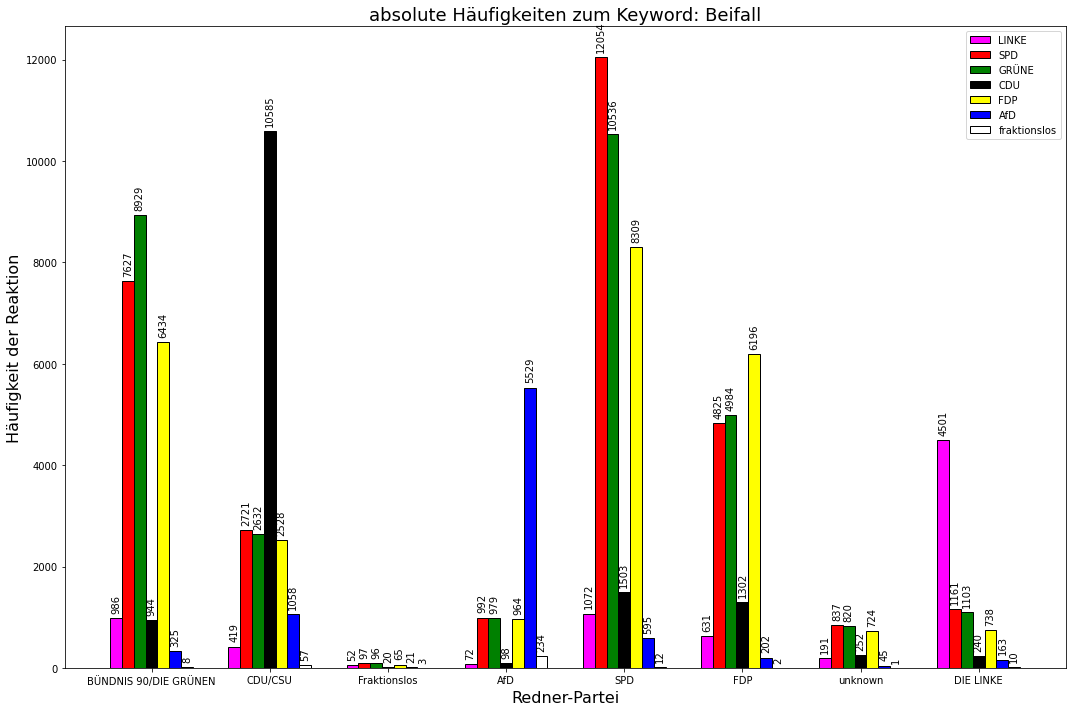

In [27]:
barplot_beifall = bar_plot(list_keywords[0],'abs')

Im nächsten Schritt werden wir das Balkendiagramm für die normalisierten Werte aufrufen. Dazu werden die Zugriffwerte Keyword: <b>Beifall</b> und Darstellung: <b>norm</b> (normalisierte Redeanteile) genutzt.<br>
Wir sehen in dem folgenden Diagramm nun eine <b>Vergleichbarkeit der Reaktion je Partei</b>. Die Reaktionen sind nun unabhängig von der Redeanteilen der einzelnen Parteien ausgegeben, d.h. bspw. sind die Reaktions-Balken der SPD-Fraktionen bei den Reden von SPD, Bündnis 90/Die GRÜNEN und FDP in etwa gleich frequentiert. Hier könnte ein Zusammenhang hinsichtlich der aktuellen Regierungskoalition SPD-GRÜNEN-FDP vermutet werden. Ähnliche Verhältnisse sehen wir ebenfalls für die GRÜNEN und FDP.<br>
Anzumerken ist außerdem, dass Redner/in aus der eigenen Fraktionen die häufigste Reaktion "Beifall" erhalten. Es ist auch zu erkennen, dass jede Partei von allen anderen Parteien Beifall erhält. Desweiteren können auch Beteiligungen aller Fraktionen bei den Reden von den fraktionslosen Abgeordneten abgelesen werden.</p>

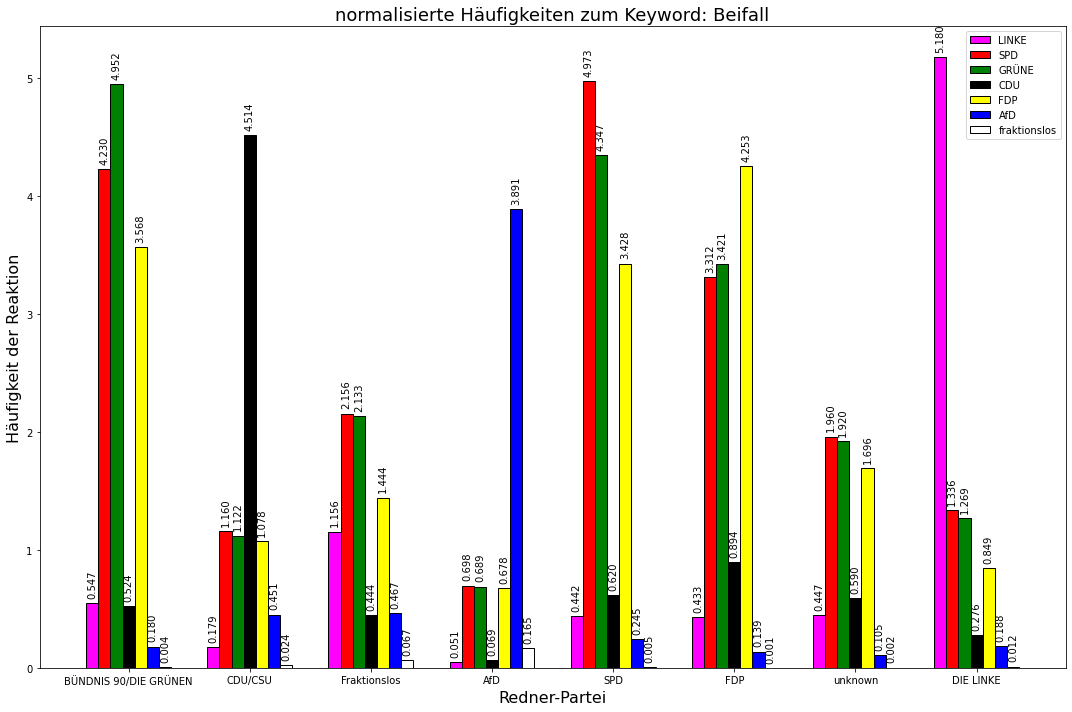

In [28]:
barplot_beifall = bar_plot(list_keywords[0],'norm')

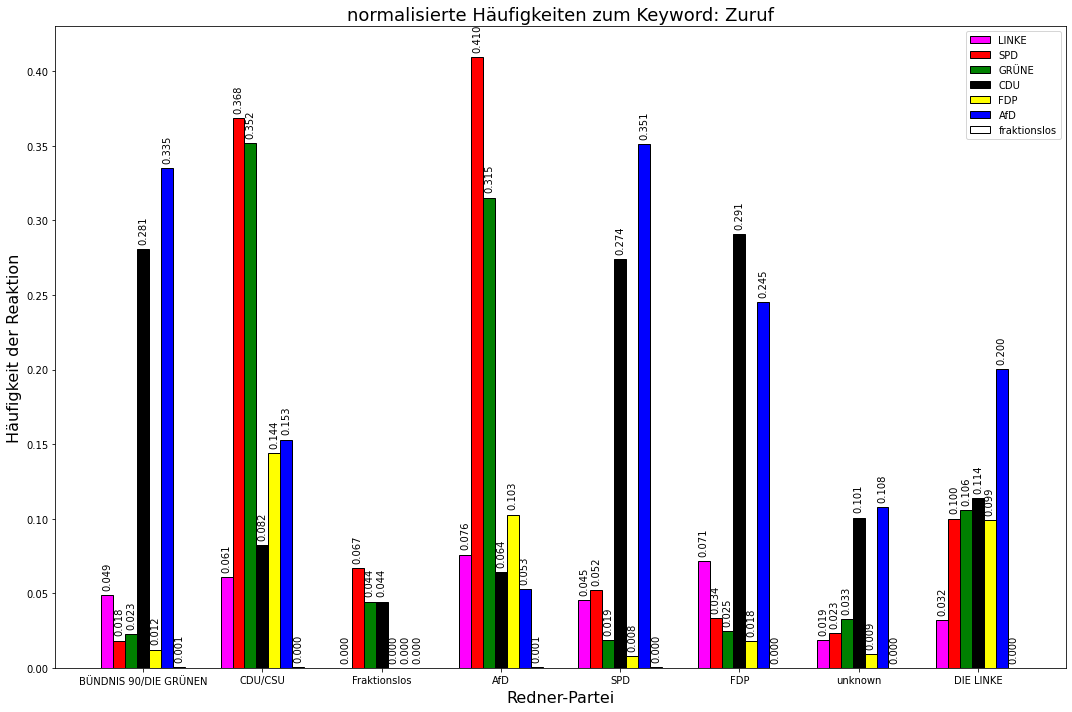

In [29]:
barplot_zuruf = bar_plot(list_keywords[1],'norm')

# Auswertung
<p style="text-align: justify">
    Allgemein sehen wir nun in den visuellen Darstellungen die jeweiligen Häufigkeiten der Reaktion für jede einzelne Redner-Fraktion. In der absoluten Darstellung sind die summierten Reaktionen aller Parteien über alle Reden je Fraktion abzulesen. Dabei sind jedoch auch die unterschiedlichen Redeanteile von Regierungsparteien und Oppositionsparteien enthalten.<br>
    Durch die Normalisierung, werden die Redeanteile herausgerechnet und somit die Reaktionshäufigkeiten vergleichbar.
Die <b>normalisierten Häufigkeiten</b> zum <b>Beifall</b> bestätigen unsere Hypothese:<br>
<i>Die Regierungsparteien SPD, GRÜNE, FDP geben Rednern der Koaltionspartei mehr positive Reaktionen, als Rednern der Oppositionsfraktionen.</i><br>
    Außerdem sehen wir, dass die Oppositionsparteien untereinander nur wenig positive Beifall-Reaktionen zukommen lassen. Zwar gibt es von allen Parteien Resonanz, aber nicht in der Häufigkeit, wie dies bei Regierungsparteien der Fall ist. Die Oppositionparteien geben somit vorrangig Redner/in der eigenen Fraktion häufige Beifallsbekundungen.<br>
    Die <b>normalisierte Darstellung</b> für <b>Zuruf</b> zeigt vor allem die Oppositionsparteien CDU und AfD mit hohen Anteilen bei Reden der Regierungsparteien CDU, GRÜNEN und FDP. Während von den Regierungsparteien SPD und GRÜNEN diese Reaktion vorrangig bei Reden von den Oppositionsparteien CDU und AfD abzulesen sind.</p>

# Fazit
<p style="text-align: justify">
   In der Auswertung können doch sehr eindeutige Rückmeldungen hinsichtlich verschiedener Stichworte, z.B. Beifall oder Zuruf, in quantitativer Weise dargestellt werden. Durch Interpretation der einzelnen Stichworte sind somit auch meinungsgebende Visualisierung möglich. Es ist beachtlich, dass bereits über wenige Stichworte doch sehr eindeutige Unterstützungen innerhalb der Regierung dargestellten werden können. Andererseits ist diese Unterstützung bei den Oppositopnsparteien nicht so ausgeprägt. Dafür sind gegenseitige Zurufe von SPD und GRÜNEN bei den Oppositionsfraktionen CDU und AfD, sowie umgekehrt, abzulesen. Diese Reaktion könnte als gegenseitige Kritikausübung interpretiert werden.<br>
    Durch Vereinfachung können somit die vielschichtigen Abläufe und somit der komplexe Regierungsapparat durch Meinungsgebende Stichworte abgebildet werden. Es ist jedoch zu bedenken, dass die Kommentare nur als unterstützende Meinungsbildung angesehen werden dürfen und auch der Kontext in einem gewissen Maße verloren geht. Hierzu bedarf es somit weiterer Analysen der Kommentare im Datensatz, um eine differenziertere Sichtweise einnehmen zu können.</p>